In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('Retail_data.csv')

In [5]:
pd.set_option("display.max_columns",df.shape[1])

In [6]:
df.sample(5)

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title
39430,30-10-2021 18:00,4.535260e+12,5.509840e+12,5.932240e+12,1.75,3.705350e+13,1,3.20,-1.28,0.0,1.92,0.0,0.18,2.10,1,1,0,#8725,Masalas & Spices,Aachi Chicken Kabab/65 Masala,Aachi,100 g,Point of Sale
89370,16-04-2022 12:00,4.723600e+12,5.314430e+12,6.739200e+12,3.39,4.000730e+13,1,6.22,0.00,0.0,6.22,0.0,0.56,6.78,1,1,0,#18152,Flour & Atta,Annam Roasted Rava (Suji),Annam,1 kg,Point of Sale
74942,02-03-2022 17:00,4.676410e+12,5.350480e+12,0.000000e+00,2.80,0.000000e+00,1,5.60,0.00,0.0,5.60,0.0,0.00,5.60,1,1,0,#15426,NaN,Ridge Gourd/ Torai/ Beerakaya/ Peerkangai (352 g),NaN,NaN,Point of Sale
35469,15-10-2021 17:00,4.208820e+12,0.000000e+00,6.878420e+12,2.99,4.048490e+13,1,5.48,0.00,0.0,5.48,0.0,0.50,5.98,1,1,0,#7939,Frozen foods,Haldiram's Phulka Roti (Frozen),Haldiram's,360 g,Point of Sale
75190,03-03-2022 14:00,4.677140e+12,5.441960e+12,6.815880e+12,0.99,4.029500e+13,1,1.82,0.00,0.0,1.82,0.0,0.16,1.98,1,1,0,#15470,Fresh Produce,Lemon (3 Pieces),dbanyan,NaN,Point of Sale


In [7]:
df.orders.value_counts()

1    95296
0     6633
Name: orders, dtype: int64

In [8]:
df.shape

(101929, 23)

In [9]:
df.isnull().sum()

hour                          0
order_id                      0
customer_id                   0
product_id                    0
product_price                 0
variant_id                    0
orders                        0
gross_sales                   0
discounts                     0
returns                       0
net_sales                     0
shipping                      0
taxes                         0
total_sales                   0
ordered_item_quantity         0
net_quantity                  0
returned_item_quantity        0
order_name                 5961
product_type              22861
product_title              6483
product_vendor            22366
variant_title             31316
api_client_title           5961
dtype: int64

In [10]:
for col in list(df):
    print(f"{col} ---->{df[col].nunique()}")

hour ---->8855
order_id ---->10767
customer_id ---->1038
product_id ---->803
product_price ---->1177
variant_id ---->699
orders ---->2
gross_sales ---->1376
discounts ---->395
returns ---->138
net_sales ---->1506
shipping ---->6
taxes ---->375
total_sales ---->1577
ordered_item_quantity ---->18
net_quantity ---->23
returned_item_quantity ---->6
order_name ---->19374
product_type ---->16
product_title ---->8074
product_vendor ---->174
variant_title ---->188
api_client_title ---->4


In [11]:
df.nunique().to_frame()

,0
hour,8855
order_id,10767
customer_id,1038
product_id,803
product_price,1177
variant_id,699
orders,2
gross_sales,1376
discounts,395
returns,138


# Product analysis

In [12]:
df1=df.dropna()

In [13]:
df1.product_type.unique()

array(['Masalas & Spices', 'Others', 'Rice & Rice products',
       'Sweets & Snacks', 'Ready to Cook & Eat', 'Organic', 'Beverages',
       'Pickles, Pastes & Papad', 'Flour & Atta',
       'Pulses, Grains & Millets', 'Noodles & Vermicelli',
       'Health & Body Care', 'Frozen foods', 'Oil', 'Fresh Produce',
       'Pooja Item'], dtype=object)

In [14]:
product_orders=df1.groupby('product_type')[['orders']].sum().sort_values(by='orders',ascending=False).reset_index()
product_orders

,product_type,orders
0,Sweets & Snacks,16789
1,Frozen foods,8379
2,Masalas & Spices,7300
3,Others,5448
4,"Pulses, Grains & Millets",5223
5,"Pickles, Pastes & Papad",4151
6,Rice & Rice products,4025
7,Ready to Cook & Eat,3833
8,Flour & Atta,3580
9,Noodles & Vermicelli,3155


In [15]:
product_sales=df1.groupby('product_type')[['total_sales']].sum().sort_values(by='total_sales',ascending=False).reset_index()
product_sales

,product_type,total_sales
0,Sweets & Snacks,95172.74
1,Frozen foods,77319.64
2,Rice & Rice products,61453.36
3,"Pulses, Grains & Millets",40477.44
4,Flour & Atta,39526.22
5,Others,37904.90
6,Masalas & Spices,32023.62
7,Ready to Cook & Eat,29291.16
8,"Pickles, Pastes & Papad",21054.76
9,Beverages,17891.24


In [16]:
pd.merge(left=product_orders,right=product_sales,on='product_type',how='inner')

,product_type,orders,total_sales
0,Sweets & Snacks,16789,95172.74
1,Frozen foods,8379,77319.64
2,Masalas & Spices,7300,32023.62
3,Others,5448,37904.90
4,"Pulses, Grains & Millets",5223,40477.44
5,"Pickles, Pastes & Papad",4151,21054.76
6,Rice & Rice products,4025,61453.36
7,Ready to Cook & Eat,3833,29291.16
8,Flour & Atta,3580,39526.22
9,Noodles & Vermicelli,3155,16181.66


In [17]:
product_type_analysis=df1.groupby('product_type').agg({'orders':sum,'total_sales':sum}).reset_index()
product_type_analysis

,product_type,orders,total_sales
0,Beverages,1375,17891.24
1,Flour & Atta,3580,39526.22
2,Fresh Produce,2970,15771.52
3,Frozen foods,8379,77319.64
4,Health & Body Care,1482,13532.18
5,Masalas & Spices,7300,32023.62
6,Noodles & Vermicelli,3155,16181.66
7,Oil,1074,13906.94
8,Organic,1182,7293.68
9,Others,5448,37904.90


Text(0.5, 1.0, 'Total Orders and Sales per product Type')

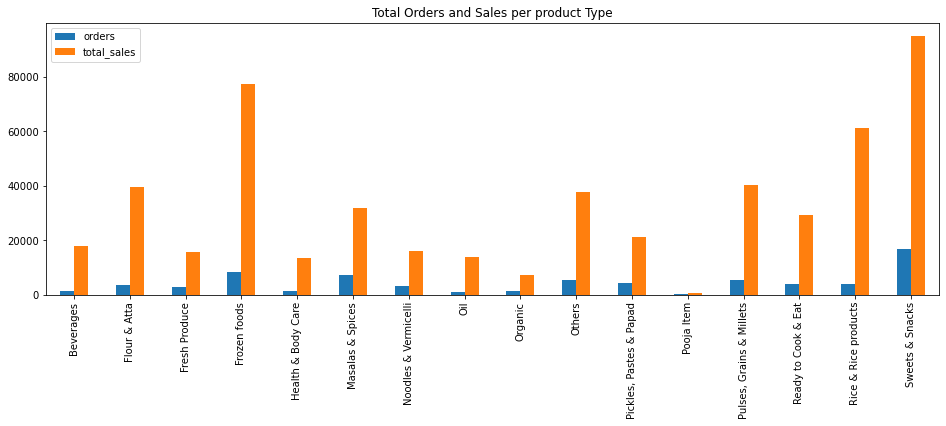

In [18]:
product_type_analysis.plot(kind='bar',figsize=(16,5));
plt.xticks(range(0,16),product_type_analysis['product_type'].values);
plt.title("Total Orders and Sales per product Type")

In [19]:
df1.api_client_title.value_counts()

Point of Sale                 65082
Online Store                   5214
Draft Orders                     27
Shopify Mobile for Android       14
Name: api_client_title, dtype: int64

In [20]:
source_of_sales=df1.pivot_table(index='api_client_title',columns='product_type',values='total_sales',aggfunc='sum')
source_of_sales

product_type,Beverages,Flour & Atta,Fresh Produce,Frozen foods,Health & Body Care,Masalas & Spices,Noodles & Vermicelli,Oil,Organic,Others,"Pickles, Pastes & Papad",Pooja Item,"Pulses, Grains & Millets",Ready to Cook & Eat,Rice & Rice products,Sweets & Snacks
api_client_title,,,,,,,,,,,,,,,,
Draft Orders,NaN,97.24,2.00,0.00,NaN,34.34,7.58,NaN,15.56,213.44,3.98,NaN,29.94,NaN,45.34,3.78
Online Store,1517.44,5838.04,4328.98,3828.76,1035.42,3091.02,1258.60,1685.34,27.00,2427.24,1846.92,98.00,4018.42,1647.34,9676.18,3898.00
Point of Sale,16373.80,33503.82,11437.56,73482.90,12496.76,28898.26,14909.50,12195.24,7251.12,35254.24,19203.86,681.94,36425.38,27643.82,51731.84,91187.10
Shopify Mobile for Android,NaN,87.12,2.98,7.98,NaN,NaN,5.98,26.36,0.00,9.98,NaN,NaN,3.70,NaN,NaN,83.86


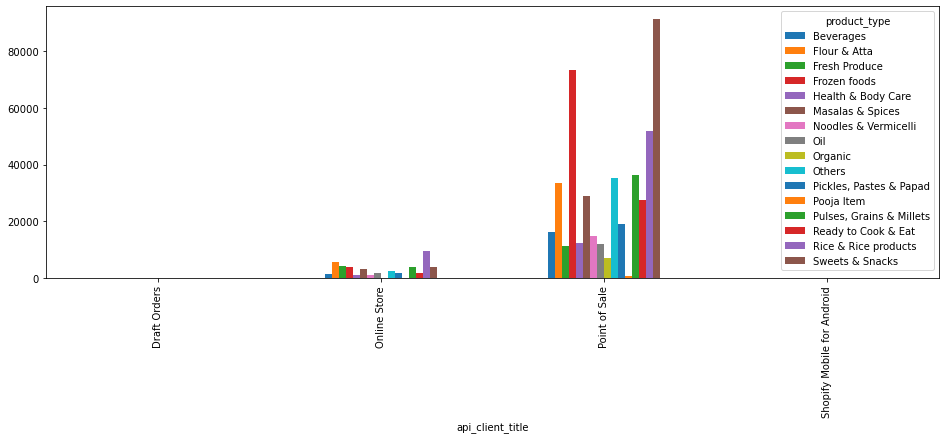

In [21]:
source_of_sales.plot(kind='bar',figsize=(16,5));

In [22]:
source_of_mean_sales=df1.pivot_table(index='api_client_title',columns='product_type',values='total_sales',aggfunc='mean')
source_of_mean_sales

product_type,Beverages,Flour & Atta,Fresh Produce,Frozen foods,Health & Body Care,Masalas & Spices,Noodles & Vermicelli,Oil,Organic,Others,"Pickles, Pastes & Papad",Pooja Item,"Pulses, Grains & Millets",Ready to Cook & Eat,Rice & Rice products,Sweets & Snacks
api_client_title,,,,,,,,,,,,,,,,
Draft Orders,NaN,16.206667,2.000000,0.000000,NaN,17.170000,7.580000,NaN,7.780000,53.360000,3.980000,NaN,9.980000,NaN,15.113333,1.260000
Online Store,14.876863,15.322940,5.913907,9.548030,10.151176,4.740828,6.730481,15.605000,4.500000,8.731079,5.116122,2.969697,7.742620,7.733991,19.992107,5.951145
Point of Sale,12.832132,10.463404,5.117477,9.206076,9.029451,4.339730,5.021724,12.624472,6.150229,6.805838,5.061639,3.294396,7.727064,7.613280,14.572349,5.644862
Shopify Mobile for Android,NaN,87.120000,1.490000,1.995000,NaN,NaN,5.980000,13.180000,0.000000,9.980000,NaN,NaN,3.700000,NaN,NaN,83.860000


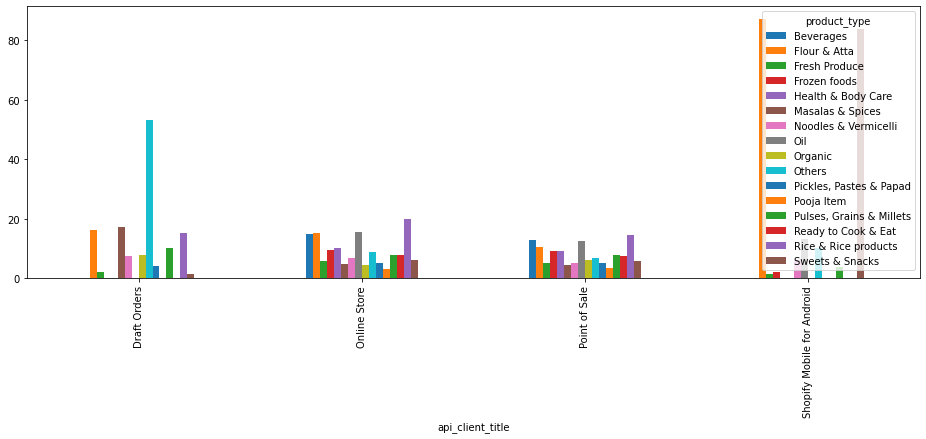

In [23]:
source_of_mean_sales.plot(kind='bar',figsize=(16,5));

# Time Wise Sales analysis

In [24]:
df.sample()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,shipping,taxes,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title
90706,21-04-2022 13:00,4.730150e+12,6.167080e+12,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,11.48,2.42,13.9,0,0,0,#18392,NaN,NaN,NaN,NaN,Online Store


In [25]:
df1['year']=pd.to_datetime(df['hour']).dt.year

C:\Users\mishaq\AppData\Local\Temp/ipykernel_9536/2057391971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year']=pd.to_datetime(df['hour']).dt.year


In [26]:
df1.sample()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,...,total_sales,ordered_item_quantity,net_quantity,returned_item_quantity,order_name,product_type,product_title,product_vendor,variant_title,api_client_title,year
97210,12-05-2022 18:00,4.753300e+12,5.281930e+12,6.719660e+12,5.39,3.994330e+13,1,9.88,0.0,0.0,9.88,...,10.78,1,1,0,#19598,Ready to Cook & Eat,Garam Idly Dosa Batter,Garam,1 kg,Point of Sale,2022


In [27]:
df1['day']=pd.to_datetime(df1['hour']).dt.day
df1['month']=pd.to_datetime(df1['hour']).dt.month
df1['weekday']=pd.to_datetime(df1['hour']).dt.weekday
df1['time']=pd.to_datetime(df1['hour']).dt.hour

C:\Users\mishaq\AppData\Local\Temp/ipykernel_9536/2237959671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day']=pd.to_datetime(df1['hour']).dt.day
C:\Users\mishaq\AppData\Local\Temp/ipykernel_9536/2237959671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month']=pd.to_datetime(df1['hour']).dt.month
C:\Users\mishaq\AppData\Local\Temp/ipykernel_9536/2237959671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [28]:
df1.sample()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,...,order_name,product_type,product_title,product_vendor,variant_title,api_client_title,year,day,month,weekday,time
95162,06-05-2022 16:00,4.747390e+12,6.104550e+12,6.747540e+12,7.89,4.021660e+13,1,14.48,0.0,0.0,14.48,...,#19216,"Pulses, Grains & Millets",TRS Red Peanuts,TRS,1.5 kg,Point of Sale,2022,5,6,6,16


In [29]:
yearly_sales=df1.groupby('year')['total_sales'].sum()
yearly_sales

year
2021    271081.88
2022    248499.12
Name: total_sales, dtype: float64

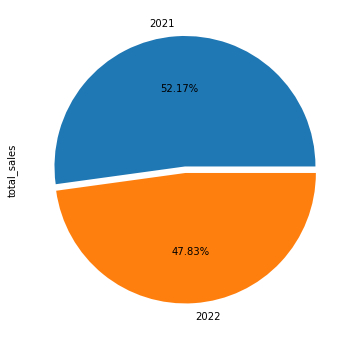

In [30]:
yearly_sales.plot(kind='pie',subplots=True,figsize=(10,6),autopct="%1.2f%%",explode=[0.025,0.025]);

In [31]:
monthly_sales=df1.groupby('month')['total_sales'].sum()
monthly_sales

month
1     46221.80
2     42117.28
3     49662.56
4     48471.76
5     55177.12
6     30787.98
7     40734.04
8     37438.36
9     37035.72
10    44825.84
11    40892.54
12    46216.00
Name: total_sales, dtype: float64

In [32]:
year_2021=df1[df1['year']== 2021]
year_2021.head()

,hour,order_id,customer_id,product_id,product_price,variant_id,orders,gross_sales,discounts,returns,net_sales,...,order_name,product_type,product_title,product_vendor,variant_title,api_client_title,year,day,month,weekday,time
11,23-05-2021 11:00,3.824510e+12,5.268530e+12,5.931930e+12,0.99,3.705210e+13,1,1.82,-0.18,0.0,1.64,...,#1078,Masalas & Spices,Everest Turmeric Powder,Everest,100 g,Point of Sale,2021,23,5,6,11
12,23-05-2021 11:00,3.824510e+12,5.268530e+12,5.931930e+12,1.39,3.705210e+13,1,2.54,-0.24,0.0,2.30,...,#1078,Others,Tata Iodised Crystal Salt,Tata,1 kg,Point of Sale,2021,23,5,6,11
15,23-05-2021 11:00,3.824510e+12,5.268530e+12,5.908010e+12,10.89,3.696460e+13,1,19.96,-1.98,0.0,17.98,...,#1078,Rice & Rice products,Udhaiyam Idli Rice,Udhaiyam,5 kg,Point of Sale,2021,23,5,6,11
19,23-05-2021 11:00,3.824520e+12,0.000000e+00,5.931100e+12,0.39,3.704750e+13,1,1.42,-0.14,0.0,1.28,...,#1079,Sweets & Snacks,Parle Biscuits - Hide & Seek,Parle G,33 g,Point of Sale,2021,23,5,6,11
20,23-05-2021 11:00,3.824520e+12,0.000000e+00,5.931100e+12,1.69,3.704750e+13,1,3.08,-0.28,0.0,2.80,...,#1079,Sweets & Snacks,Parle Biscuits - Monaco,Parle G,200 g,Point of Sale,2021,23,5,6,11


In [33]:
year_2021.year.value_counts()

2021    37305
Name: year, dtype: int64

In [34]:
monthly_sales_2021=year_2021.groupby('month')['total_sales'].sum()
monthly_sales_2021

month
1      7124.50
2      8772.54
3     10418.66
4      8568.10
5     17328.08
6     22910.40
7     32687.88
8     27235.62
9     29608.86
10    37308.16
11    33353.56
12    35765.52
Name: total_sales, dtype: float64

<AxesSubplot:xlabel='month'>

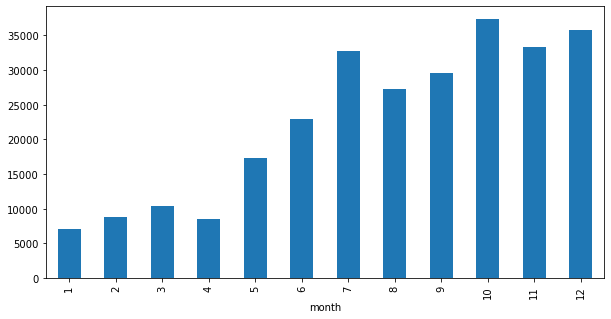

In [35]:
monthly_sales_2021.plot(kind='bar',figsize=(10,5))

<AxesSubplot:xlabel='month'>

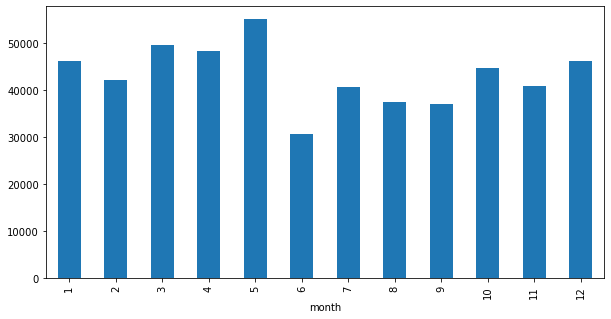

In [36]:
monthly_sales.plot(kind='bar',figsize=(10,5))

# Assignments for Product Analysis Team

In [37]:
df1.columns

Index(['hour', 'order_id', 'customer_id', 'product_id', 'product_price',
       'variant_id', 'orders', 'gross_sales', 'discounts', 'returns',
       'net_sales', 'shipping', 'taxes', 'total_sales',
       'ordered_item_quantity', 'net_quantity', 'returned_item_quantity',
       'order_name', 'product_type', 'product_title', 'product_vendor',
       'variant_title', 'api_client_title', 'year', 'day', 'month', 'weekday',
       'time'],
      dtype='object')

### 1.For each product_type how many products are associated?  (Graph expected)

In [38]:
associated_products= df1.groupby('product_type')['product_title'].nunique().to_frame().reset_index().sort_values(by = 'product_title', ascending= False)
associated_products

,product_type,product_title
5,Masalas & Spices,232
15,Sweets & Snacks,224
10,"Pickles, Pastes & Papad",157
3,Frozen foods,148
9,Others,139
13,Ready to Cook & Eat,119
1,Flour & Atta,89
14,Rice & Rice products,75
12,"Pulses, Grains & Millets",71
4,Health & Body Care,68


Text(0.5, 1.0, 'Products per product Type')

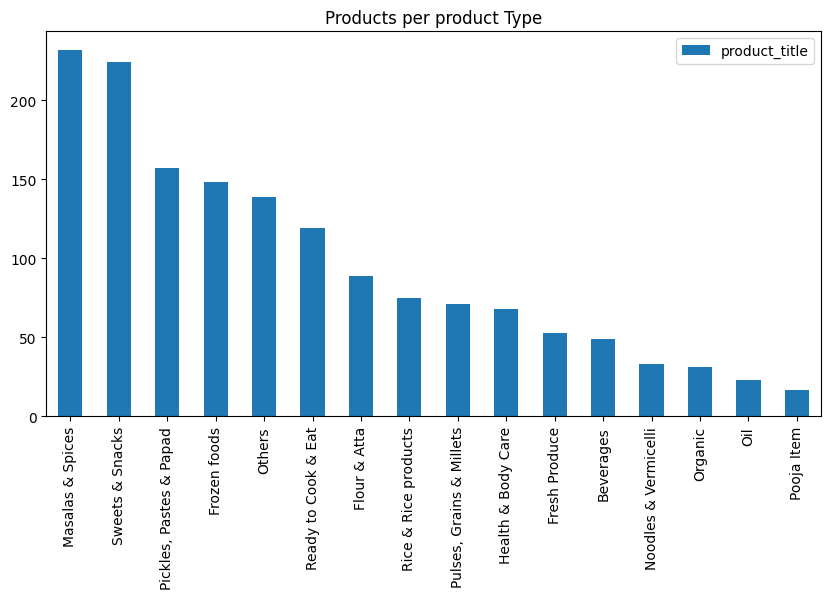

In [204]:
associated_products.plot(kind='bar',figsize=(10,5))
plt.xticks(range(0,16),associated_products['product_type'].values);
plt.title("Products per product Type")


### 2.For each product_type how many products are associated and thier sales
### Output expected:
**Output cols = product_type,product_title,total_sales**

In [40]:
product_type_sales= df1.groupby(['product_type','product_title'])['total_sales'].sum().to_frame().reset_index().sort_values(by = 'total_sales', ascending= False)
product_type_sales

,product_type,product_title,total_sales
1142,Ready to Cook & Eat,Garam Idly Dosa Batter,12172.22
1243,Rice & Rice products,Annam Sona Masoori Rice,11448.88
53,Flour & Atta,Aashirvaad Atta - Whole Wheat (Export Pack),10535.18
660,Noodles & Vermicelli,Nestlé Maggi 2 Minute Instant Noodles Masala -...,6860.06
1084,"Pulses, Grains & Millets",TRS Tur/Toor Dal,5981.30
...,...,...,...
886,"Pickles, Pastes & Papad",Ambika Mango Vathal,2.50
429,Masalas & Spices,Aachi Tamarind/Puliyodharai Mix,1.58
1023,Pooja Item,Ambala Sandhanam/Chandan/Sandalwood Powder,1.18
791,Others,Nestlé Maggi Pichkoo - Tomato Ketchup,0.58


### 3. Which product has the most sales ? (Graph expected)

In [41]:

max_sales=df1.groupby('product_title')['total_sales'].sum().to_frame().reset_index().sort_values(by = 'total_sales', ascending= False)
max_sales.head(1)

,product_title,total_sales
556,Garam Idly Dosa Batter,12172.22


### Which product has the least sales?

In [42]:
min_sales=df1.groupby('product_title')['total_sales'].sum().to_frame().reset_index().sort_values(by = 'total_sales', ascending=True)
min_sales.head(1)

,product_title,total_sales
1413,Tata Sampann Red Rice Flakes/Aval/Poha,0.0


### 4.Does the most sold product and least sold product has equal sales in every month or not?

In [43]:
df2=df1.query("product_title in ('Garam Idly Dosa Batter','Tata Sampann Red Rice Flakes/Aval/Poha')")

salebymonth = df2.groupby(['month','product_title'])['total_sales'].aggregate(['min','max'])
salebymonth

min    max
month product_title                                       
1     Garam Idly Dosa Batter                   9.28  29.34
2     Garam Idly Dosa Batter                   9.28  21.56
3     Garam Idly Dosa Batter                   9.28  43.12
4     Garam Idly Dosa Batter                   9.28  21.56
5     Garam Idly Dosa Batter                 -10.78  21.56
      Tata Sampann Red Rice Flakes/Aval/Poha   0.00   0.00
6     Garam Idly Dosa Batter                   8.80  21.56
7     Garam Idly Dosa Batter                   8.80  29.34
8     Garam Idly Dosa Batter                   8.80  20.48
9     Garam Idly Dosa Batter                   8.30  30.74
10    Garam Idly Dosa Batter                   9.28  39.12
11    Garam Idly Dosa Batter                   8.80  29.34
12    Garam Idly Dosa Batter                   8.80  29.34

### 5.Does the most sold product and least sold product has equal sales in every year or not?

In [44]:
salebymonth = df2.groupby(['year','product_title'])['total_sales'].aggregate(['min','max'])
salebymonth

min    max
year product_title                                       
2021 Garam Idly Dosa Batter                   4.88  39.12
     Tata Sampann Red Rice Flakes/Aval/Poha   0.00   0.00
2022 Garam Idly Dosa Batter                 -10.78  43.12

### 6. Check if any products sold has any relationship w.r.t to customers? (Graph expected)

In [154]:
df = df1[df1['customer_id'].duplicated(keep=False)]
df['grouped']= df.groupby('customer_id')['product_title'].transform(lambda x: ','.join(x))
df = df[['customer_id', 'grouped']].drop_duplicates()
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_21912\2593153348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped']= df.groupby('customer_id')['product_title'].transform(lambda x: ','.join(x))


,customer_id,grouped
11,5.268530e+12,"Everest Turmeric Powder,Tata Iodised Crystal S..."
19,0.000000e+00,"Parle Biscuits - Hide & Seek,Parle Biscuits - ..."
34,5.268650e+12,"Britannia Biscuits - Bourbon,Sri Ganeshram's 7..."
35,5.268600e+12,"Aashirvaad Select Atta,MDH Garam Masala,Britan..."
36,5.250470e+12,"Haldiram's Murukku,Priya Pickle - Tomato,Haldi..."


In [161]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(25):
    print(key, value)

('Dbanyan Tas', 'Dbanyan Tas') 8391
('Nissin Top Ramen Noodles - Masala', 'Dbanyan Tas') 6864
('Garam Idly Dosa Batter', 'Garam Idly Dosa Batter') 6535
('Dbanyan Tas', 'Coriander Leaves (Per Bunch)') 6341
("Haldiram's Samosa", 'Dbanyan Tas') 5528
('Nissin Top Ramen Noodles - Fiery Chilli', 'Dbanyan Tas') 4188
('Britannia Biscuits - Bourbon', 'Dbanyan Tas') 4183
('Dbanyan Tas', "Haldiram's Tandoori Garlic Naan (Frozen)") 3978
("Haldiram's Aloo Bhujia", 'Dbanyan Tas') 3826
('Nissin Top Ramen Noodles - Masala', 'Coriander Leaves (Per Bunch)') 3808
('Parle Biscuits - Hide & Seek', 'Dbanyan Tas') 3785
("Haldiram's Tandoori Garlic Naan (Frozen)", 'Dbanyan Tas') 3768
('Nestlé Maggi 2 Minute Instant Noodles Masala - Family pack', 'Dbanyan Tas') 3632
('Daily Delight - Coconut Grated (Frozen)', 'Daily Delight - Coconut Grated (Frozen)') 3593
('Nestlé Maggi Instant Noodles - Chicken', 'Dbanyan Tas') 3563
('Garam Idly Dosa Batter', 'Dbanyan Tas') 3450
('Nissin Top Ramen Noodles - Masala', "Haldira

### 7.Check the relationship between product_title and variant w.r.t total_sales? (Graph expected).

In [225]:
producttype_varient= df1.groupby(['product_title', 'variant_title'])['total_sales'].sum().to_frame().reset_index().sort_values(by = 'variant_title', ascending= False)
producttype_varient

,product_title,variant_title,total_sales
1165,NVF Paneer,~450 g,278.92
1125,Methi Leaves (Per Bunch),~400 g,135.66
1164,NVF Paneer,~400 g,258.16
1124,Methi Leaves (Per Bunch),~300g,630.62
1128,Methi Leaves (Per Stuk),~300g,9.46
...,...,...,...
393,Chekko Virgin Cocunut oil,0.5 litre,125.92
398,Chekko Virgin Groundnut oil,0.5 litre,59.22
401,Chekko Virgin Sesame Oil,0.5 litre,283.02
1727,Tata Sampann Red Rice Flakes/Aval/Poha,0.5 kg,0.00


In [230]:
PT=producttype_varient.head(30)
PT

,product_title,variant_title,total_sales
1165,NVF Paneer,~450 g,278.92
1125,Methi Leaves (Per Bunch),~400 g,135.66
1164,NVF Paneer,~400 g,258.16
1124,Methi Leaves (Per Bunch),~300g,630.62
1128,Methi Leaves (Per Stuk),~300g,9.46
1122,Methi /Fenugreek Leaves (Per Stuk),~300g,68.46
1103,Mango - Rasalu Box (~3 kg),~3 kg,61.20
1123,Methi Leaves (Per Bunch),~200g,302.92
1127,Methi Leaves (Per Stuk),~200g,44.62
1126,Methi Leaves (Per Stuk),~150g,22.32


<AxesSubplot: >

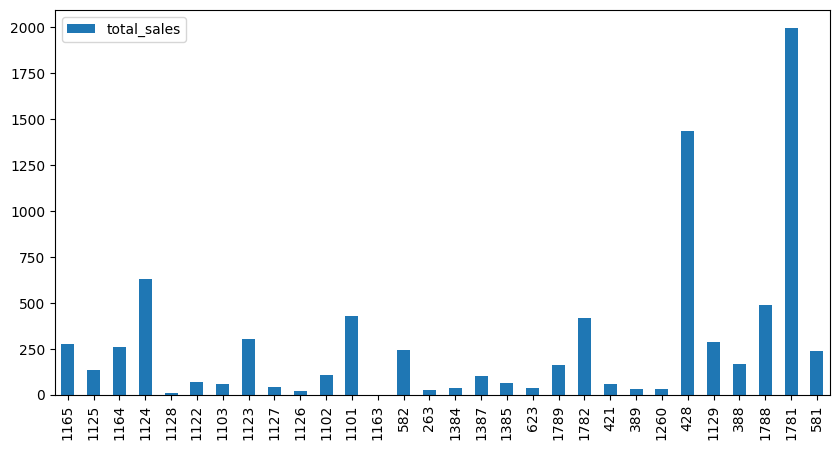

In [231]:
PT.plot(kind='bar',figsize=(10,5))

### 8. Does price of the product affect the sales?

In [205]:
producteffect_sales = df1.groupby('product_type')['product_price'].sum().to_frame().reset_index().sort_values(by = 'product_price', ascending= False)
producteffect_sales 

,product_type,product_price
15,Sweets & Snacks,44006.70
3,Frozen foods,33100.80
14,Rice & Rice products,30065.09
12,"Pulses, Grains & Millets",19703.91
1,Flour & Atta,19044.83
9,Others,18033.77
5,Masalas & Spices,15592.55
13,Ready to Cook & Eat,13503.98
10,"Pickles, Pastes & Papad",10500.27
0,Beverages,8615.78


Text(0.5, 1.0, 'Products per product Type')

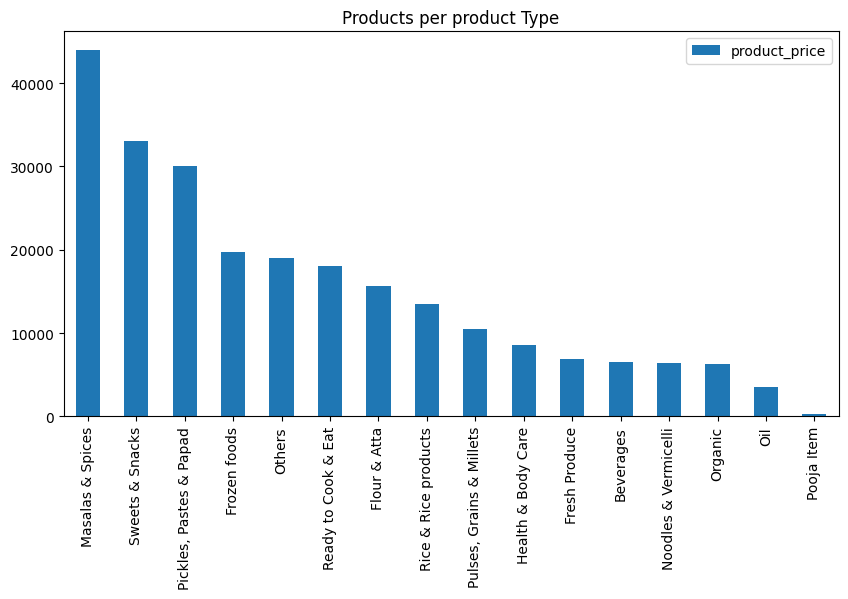

In [206]:
producteffect_sales.plot(kind='bar',figsize=(10,5))
plt.xticks(range(0,16),associated_products['product_type'].values);
plt.title("Products per product Type")

### 9. Is the highest and least sold product same each month?

<AxesSubplot: xlabel='month'>

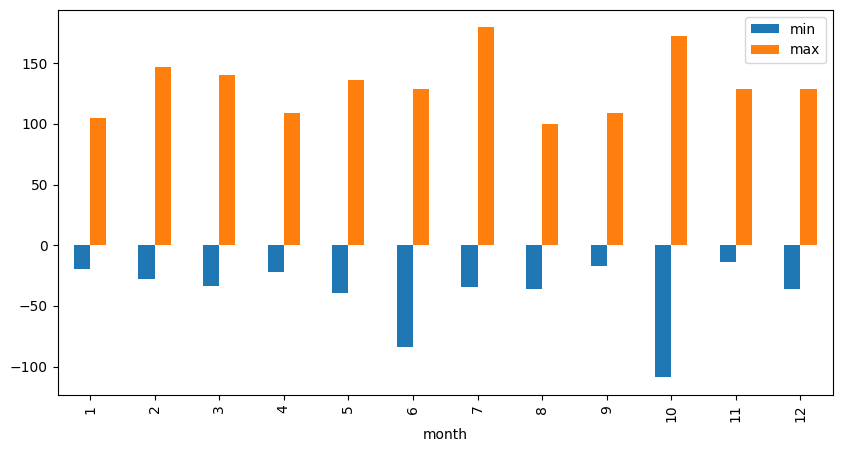

In [180]:
productsoldbymonth = df1.groupby(['month'])['total_sales'].aggregate(['min','max'])
productsoldbymonth.plot(kind='bar',figsize=(10,5))

###  10..Does vendor role plays a factor in affecting the sales?  

In [219]:
Vendoranalysis=df1.groupby('product_vendor').agg({'orders':sum,'total_sales':sum}).reset_index().sort_values(by = 'orders', ascending= False)

Vendoranalysis

,product_vendor,orders,total_sales
61,Haldiram's,10777,81466.18
145,TRS,10668,67722.98
40,Daily Delight,4710,33136.00
167,dbanyan,3689,15037.46
12,Annam,3065,34698.12
...,...,...,...
103,Medjoul,4,62.82
72,Jo-La,4,23.92
78,Kavadi,3,20.94
49,Elephant,3,55.54


In [232]:
VA=Vendoranalysis.head()

<AxesSubplot: >

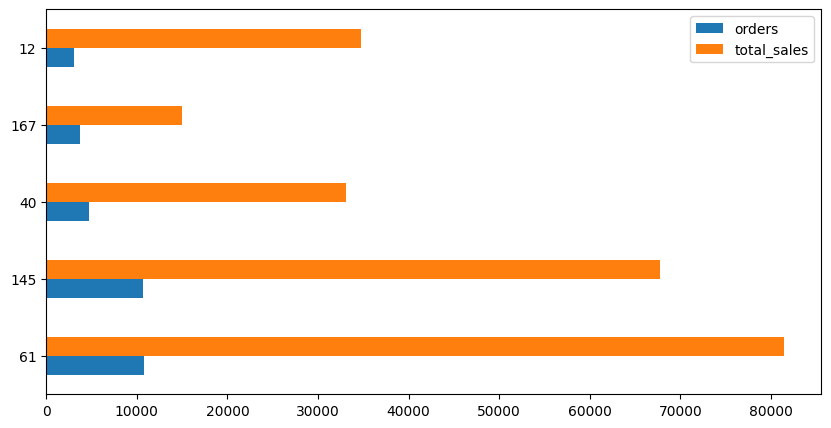

In [233]:
VA.plot(kind='barh',figsize=(10,5))


### 11.is there any relationship between product,vendor and price?

In [184]:

Product_Vender_priceanalysis =  df1.groupby(['product_type', 'product_vendor'])['product_price'].sum().to_frame().reset_index().sort_values(by = 'product_price', ascending= False)
Product_Vender_priceanalysis


,product_type,product_vendor,product_price
274,Sweets & Snacks,Haldiram's,17958.00
44,Frozen foods,Haldiram's,17887.57
217,"Pulses, Grains & Millets",TRS,15511.89
19,Flour & Atta,Aashirvaad,10893.27
246,Rice & Rice products,Annam,10508.41
...,...,...,...
209,Pooja Item,Top Op,6.87
208,Pooja Item,TSR,5.94
202,Pooja Item,Ambala,5.57
199,"Pickles, Pastes & Papad",Sakthi,5.34


# Assignments for Time Wise Analysis Team

### 1. Is Sales trend common for each timeline like year,month,day,week?  (Graph Expected)

### 2. How weekends are affecting the total sales trend when compared with weekdays?Draw an inference for the same (Graph also Expected)

### 3. Should  the prices should vary in weekdays and weekends?

### 4. What is the peak time interms of orders and sales? 

### 5. Are the orders decreasing or increasing in every month,year? (Graph Expected)

### 6.is there any trend between products sold in a particular timeline?

### 7.Which statistical measure will you use to find the peak orders ? 

### 8.Is there any particular time (hrs) the customers tend to order more?

### 9. How should the prices vary for every hour in day? 

### 10. Do you observe any seasonality or trend online sale are more in weekends than weekdays?

# Customer Analysis

In [45]:
df.customer_id.nunique()

1038

### 1. Find out the avg orders and avg totalsales  per customers?

### 2.Find out the customer first and last purchase to identity the no of days the customer is with us?

### 3. Find out the Customer purchase frequency?

### 4.What is the highest and least purchases done by the customers?

### 5. No of days difference between each purchase made by customers?

### 6.Most purchased product by a customer?

### 7.Find the Top 5 customers with most orders?